<a href="https://colab.research.google.com/github/HerveMignot/airtraffic/blob/main/notebooks/analyze_traffic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pandas-profiling


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install mlforecast


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Analyze traffic dataset ✈

Use fbprophet, nixtla ml forecast and nixtla neural forecaster.

In [2]:
import pandas as pd

from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport # from April, 1st 2023

c:\Users\coffy\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

c:\Users\coffy\AppData\Local\Programs\Python\Python310\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

C:\Users\coffy\AppData\Local\Temp\ipykernel_10612\1729990231.py:3: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `i

In [4]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [5]:
traffic_df.describe(include='all').transpose()

C:\Users\coffy\AppData\Local\Temp\ipykernel_10612\2397933778.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\coffy\AppData\Local\Temp\ipykernel_10612\2397933778.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,254899,2626,2019-01-02 00:00:00,165,2016-01-01 00:00:00,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pax,254899.0,NaN,NaN,NaN,NaT,NaT,127.082676,53.050019,-11.0,88.0,140.0,168.0,582.0
seats,250749.0,NaN,NaN,NaN,NaT,NaT,159.352879,47.311964,0.0,144.0,174.0,186.0,615.0
flight_type,251168,19,J,240627,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight_typename,254899,4,Scheduled,251250,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airport,254899,8,LIS,125254,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airport,254899,10,OPO,72331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_airportname,254899,8,Lisbon,125254,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paired_airportname,254899,10,Porto,72331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,254899.0,NaN,NaN,NaN,NaT,NaT,944.365078,886.540144,277.0,277.0,1109.0,1437.0,11653.0


In [6]:
profile_report = ProfileReport(traffic_df)

In [7]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
traffic_df

,date,pax,seats,flight_type,flight_typename,home_airport,paired_airport,home_airportname,paired_airportname,distance,...,airline_iata,airline_name,scheduled_datetime,direction,home_country,paired_country,home_countryname,paired_countryname,travel_area,aircraft_type
3223247,2018-08-04,155.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2018-08-04 12:15:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223311,2017-05-03,132.0,144.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,BA,British Airways,2017-05-03 11:20:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223347,2022-08-05,136.0,156.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2022-08-05 21:55:00,A,GB,ES,United Kingdom,Spain,International Short-Haul,319
3223366,2019-10-16,170.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,EC,EasyJet,2019-10-16 09:10:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
3223425,2019-01-26,166.0,180.0,J,Scheduled,LGW,BCN,London Gatwick Airport,Barcelone,1109,...,U2,EasyJet,2019-01-26 06:55:00,D,GB,ES,United Kingdom,Spain,International Short-Haul,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977453,2022-04-19,72.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2022-04-19 07:25:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977758,2020-03-22,162.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2020-03-22 16:45:00,D,CL,GB,Chile,United Kingdom,International Long-Haul,789
9977808,2021-12-23,164.0,313.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2021-12-23 10:04:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,789
9995284,2019-04-06,161.0,216.0,J,Scheduled,SCL,LHR,Comodoro Arturo Merino Benitez International A...,London Heathrow Airport,11653,...,BA,British Airways,2019-04-06 08:35:00,A,CL,GB,Chile,United Kingdom,International Long-Haul,Boeing 787-900


In [ ]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
 .reset_index()
)

,home_airport,paired_airport,direction,date_min,date_max,pax
0,LGW,AMS,A,2016-01-01,2023-03-09,2686346.0
1,LGW,AMS,D,2016-01-01,2023-03-09,2686476.0
2,LGW,BCN,A,2016-01-01,2023-03-10,3813240.0
3,LGW,BCN,D,2016-01-01,2023-03-09,3799836.0
4,LIS,OPO,A,2016-01-01,2023-03-09,2819094.0
5,LIS,OPO,D,2016-01-01,2023-03-09,2813651.0
6,LIS,ORY,A,2016-01-01,2023-03-09,3835664.0
7,LIS,ORY,D,2016-01-01,2023-03-09,3860404.0
8,LYS,PIS,A,2017-11-20,2023-03-09,6173.0
9,LYS,PIS,D,2018-01-02,2023-03-09,4178.0


## Visualization

In [8]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
)

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

In [9]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [10]:
# Si vous êtes sous Jupyter
%matplotlib inline

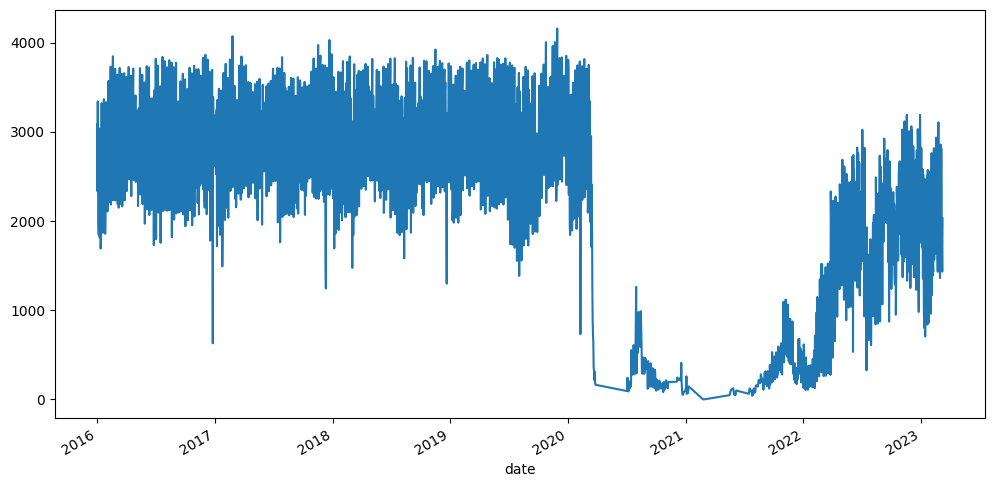

In [11]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [12]:
import seaborn as sns

sns.set()

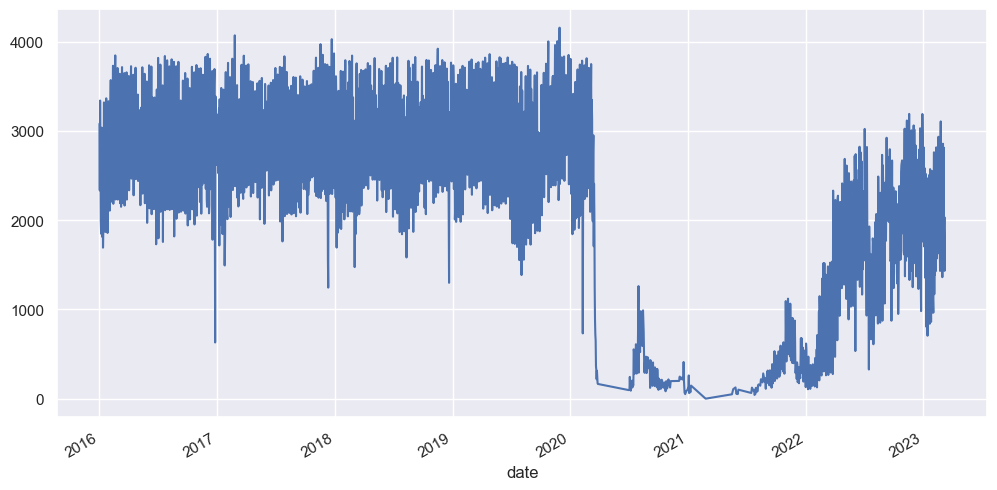

In [13]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [14]:
import datetime
import plotly

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [15]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

In [16]:
nte_fue_df = (traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
nte_fue_df

,home_airport,paired_airport,date,pax_total
0,NTE,FUE,2019-01-06,456.0
1,NTE,FUE,2019-01-07,142.0
2,NTE,FUE,2019-01-13,519.0
3,NTE,FUE,2019-01-20,553.0
4,NTE,FUE,2019-01-27,528.0
...,...,...,...,...
288,NTE,FUE,2023-02-19,296.0
289,NTE,FUE,2023-02-25,638.0
290,NTE,FUE,2023-02-26,289.0
291,NTE,FUE,2023-03-04,584.0


In [17]:
lgw_ams_df = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
lgw_ams_df

,home_airport,paired_airport,date,pax_total
0,LGW,AMS,2016-01-01,3081.0
1,LGW,AMS,2016-01-02,2334.0
2,LGW,AMS,2016-01-03,3341.0
3,LGW,AMS,2016-01-04,2665.0
4,LGW,AMS,2016-01-05,1996.0
...,...,...,...,...
2243,LGW,AMS,2023-03-05,2815.0
2244,LGW,AMS,2023-03-06,1916.0
2245,LGW,AMS,2023-03-07,1741.0
2246,LGW,AMS,2023-03-08,1432.0


## First model with Facebook

In [18]:
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total=('pax', 'sum'))
         .reset_index()
         )
  return _df

In [19]:
generate_route_df(traffic_df, "LGW", "AMS")

,home_airport,paired_airport,date,pax_total
0,LGW,AMS,2016-01-01,3081.0
1,LGW,AMS,2016-01-02,2334.0
2,LGW,AMS,2016-01-03,3341.0
3,LGW,AMS,2016-01-04,2665.0
4,LGW,AMS,2016-01-05,1996.0
...,...,...,...,...
2243,LGW,AMS,2023-03-05,2815.0
2244,LGW,AMS,2023-03-06,1916.0
2245,LGW,AMS,2023-03-07,1741.0
2246,LGW,AMS,2023-03-08,1432.0


In [21]:
from prophet import Prophet

In [22]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date': 'ds', 'pax_total': 'y'}))

11:48:53 - cmdstanpy - INFO - Chain [1] start processing
11:48:53 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_df = baseline_model.make_future_dataframe(periods=15) # Prepare to predict 15 days
future_df

,ds
0,2019-01-06
1,2019-01-07
2,2019-01-13
3,2019-01-20
4,2019-01-27
...,...
303,2023-03-16
304,2023-03-17
305,2023-03-18
306,2023-03-19


In [24]:
forecast_df = baseline_model.predict(future_df)

In [25]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,367.093888,334.804348,628.430976,367.093888,367.093888,113.948595,113.948595,113.948595,137.322102,137.322102,137.322102,-23.373507,-23.373507,-23.373507,0.0,0.0,0.0,481.042483
1,2019-01-07,366.856232,66.235688,375.392739,366.856232,366.856232,-147.543348,-147.543348,-147.543348,-114.800081,-114.800081,-114.800081,-32.743267,-32.743267,-32.743267,0.0,0.0,0.0,219.312884
2,2019-01-13,365.430297,269.094015,574.409835,365.430297,365.430297,57.095577,57.095577,57.095577,137.322102,137.322102,137.322102,-80.226524,-80.226524,-80.226524,0.0,0.0,0.0,422.525874
3,2019-01-20,363.766706,262.375979,565.916055,363.766706,363.766706,50.345523,50.345523,50.345523,137.322102,137.322102,137.322102,-86.976578,-86.976578,-86.976578,0.0,0.0,0.0,414.112229
4,2019-01-27,362.103114,310.814229,622.338839,362.103114,362.103114,104.603776,104.603776,104.603776,137.322102,137.322102,137.322102,-32.718326,-32.718326,-32.718326,0.0,0.0,0.0,466.706891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-03-16,246.885496,-33.828738,261.478359,246.885496,246.885496,-135.519670,-135.519670,-135.519670,-259.345050,-259.345050,-259.345050,123.825379,123.825379,123.825379,0.0,0.0,0.0,111.365826
304,2023-03-17,246.921711,268.341910,567.446408,246.921711,246.921711,168.348872,168.348872,168.348872,44.033368,44.033368,44.033368,124.315503,124.315503,124.315503,0.0,0.0,0.0,415.270583
305,2023-03-18,246.957926,328.367541,624.289074,246.957926,246.957961,229.443814,229.443814,229.443814,104.723101,104.723101,104.723101,124.720713,124.720713,124.720713,0.0,0.0,0.0,476.401740
306,2023-03-19,246.994141,352.168018,651.145657,246.992843,246.995451,262.389225,262.389225,262.389225,137.322102,137.322102,137.322102,125.067124,125.067124,125.067124,0.0,0.0,0.0,509.383367


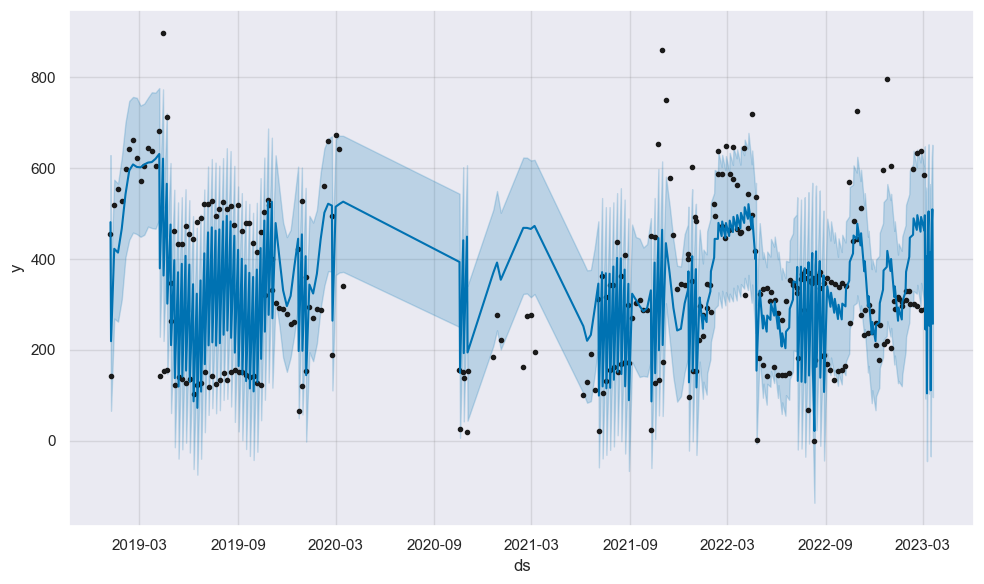

In [26]:
graph = baseline_model.plot(forecast_df)

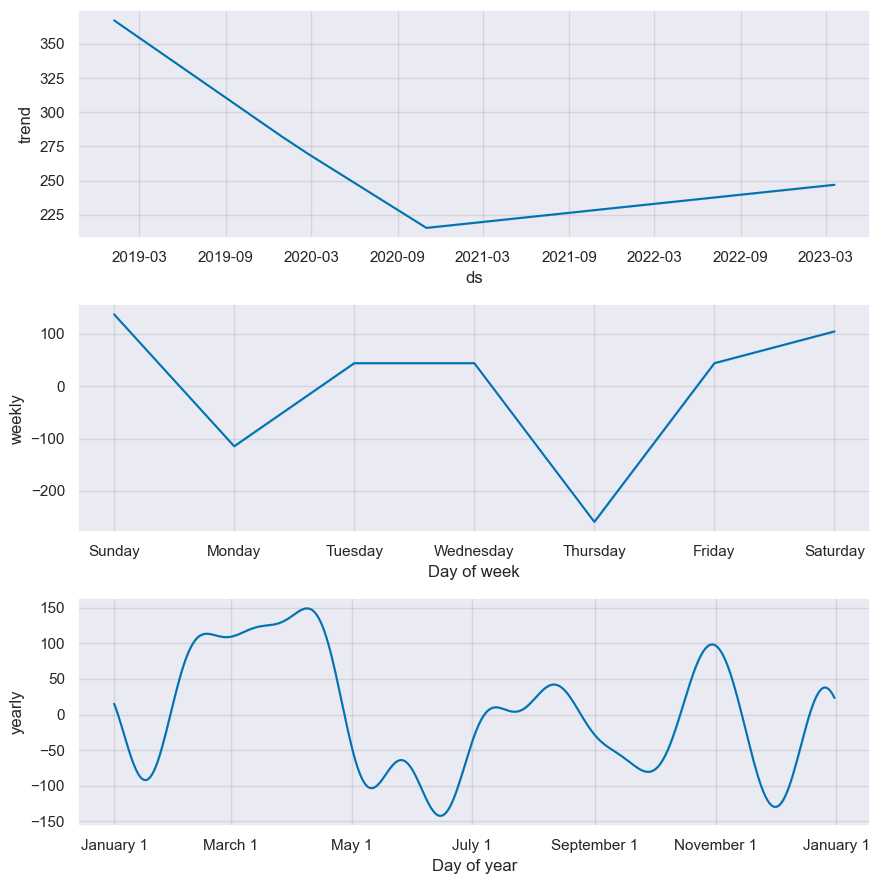

In [27]:
baseline_model.plot_components(forecast_df);

### Evaluate performance

In [28]:
from prophet.diagnostics import cross_validation

In [29]:
eval_df = cross_validation(baseline_model, initial='366 days', period='90 days', horizon='90 days')

  0%|          | 0/10 [00:00<?, ?it/s]

11:49:17 - cmdstanpy - INFO - Chain [1] start processing
11:49:17 - cmdstanpy - INFO - Chain [1] done processing
11:49:17 - cmdstanpy - INFO - Chain [1] start processing
11:49:17 - cmdstanpy - INFO - Chain [1] done processing
11:49:17 - cmdstanpy - INFO - Chain [1] start processing
11:49:17 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1]

In [30]:
eval_df

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-10-18,447.472952,357.955105,540.160813,155.0,2020-09-16
1,2020-10-19,124.280990,38.697120,215.913269,26.0,2020-09-16
2,2020-10-25,488.585274,398.186097,576.395400,152.0,2020-09-16
3,2020-10-26,153.801841,58.527282,249.470170,139.0,2020-09-16
4,2020-11-01,439.584883,351.070484,526.034430,20.0,2020-09-16
...,...,...,...,...,...,...
189,2023-02-19,575.982834,440.366402,721.921512,296.0,2022-12-05
190,2023-02-25,475.481968,336.180981,612.015539,638.0,2022-12-05
191,2023-02-26,566.938981,433.367485,695.397752,289.0,2022-12-05
192,2023-03-04,475.651615,342.536430,616.695657,584.0,2022-12-05


In [31]:
from prophet.diagnostics import performance_metrics

In [32]:
performance_metrics(eval_df)

,horizon,mse,rmse,mae,mdape,smape,coverage
0,10 days,8116.194134,90.089922,73.271743,0.209237,0.285707,0.736842
1,11 days,9506.164613,97.499562,79.280503,0.227061,0.320916,0.710526
2,12 days,12525.365872,111.916781,86.913537,0.209237,0.327976,0.684211
3,13 days,13835.565833,117.624682,91.620977,0.229192,0.338166,0.657895
4,14 days,13021.563888,114.112067,86.599678,0.196127,0.323241,0.684211
...,...,...,...,...,...,...,...
76,86 days,35259.611917,187.775429,154.207376,0.567009,0.615932,0.456140
77,87 days,31288.958742,176.886853,150.978659,0.497553,0.555548,0.421053
78,88 days,28791.705708,169.681188,142.798997,0.445583,0.528174,0.421053
79,89 days,25005.237304,158.130444,131.173125,0.388163,0.488929,0.526316


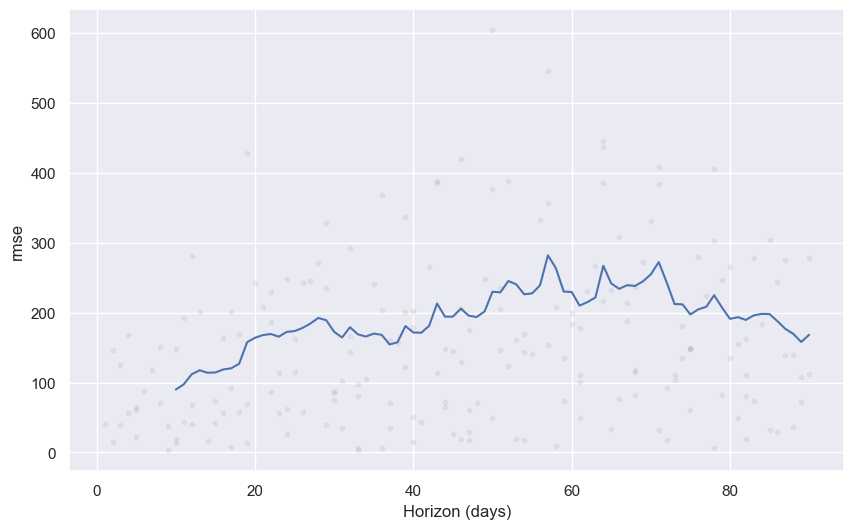

In [33]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

### Automate model fitting and evaluation

In [34]:
routes = (traffic_df
 .drop_duplicates(subset=['home_airport', 'paired_airport'])
 [['home_airport', 'paired_airport']]
 .to_dict(orient='rows')
)

C:\Users\coffy\AppData\Local\Temp\ipykernel_10612\3241727012.py:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [35]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
#logging.getLogger('prophet').setLevel(logging.WARNING)

In [36]:
models = dict()
performances = dict()

for route in routes:
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  # Build route traffic dataframe
  _df = generate_route_df(traffic_df, home, paired)
  # Create a model
  _model = Prophet()
  # Fit the model
  _model.fit(_df.rename(columns={'date': 'ds', 'pax_total': 'y'}))
  # Cross validate the model
  _cv_df = cross_validation(_model, horizon='90 days', parallel="processes")
  _perf_df = performance_metrics(_cv_df, rolling_window=1)
  # Save results
  models[(route['home_airport'], route['paired_airport'])] = _model
  performances[(route['home_airport'], route['paired_airport'])] = _perf_df['rmse'].values[0]
  

{'home_airport': 'LGW', 'paired_airport': 'BCN'}
{'home_airport': 'LGW', 'paired_airport': 'AMS'}
{'home_airport': 'LIS', 'paired_airport': 'ORY'}
{'home_airport': 'LIS', 'paired_airport': 'OPO'}
{'home_airport': 'SSA', 'paired_airport': 'GRU'}
{'home_airport': 'NTE', 'paired_airport': 'FUE'}
{'home_airport': 'LYS', 'paired_airport': 'PIS'}
{'home_airport': 'PNH', 'paired_airport': 'NGB'}
{'home_airport': 'POP', 'paired_airport': 'JFK'}
{'home_airport': 'SCL', 'paired_airport': 'LHR'}


In [37]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x2229c76eb90>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x2229c549150>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x222858da170>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x2229c687970>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x222929538e0>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x2229c5bfa30>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x222929291b0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x222929298a0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x222859f4af0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x222c1cbbb20>}

In [38]:
performances

{('LGW', 'BCN'): 1253.154090155653,
 ('LGW', 'AMS'): 925.8531954294384,
 ('LIS', 'ORY'): 870.2145779842895,
 ('LIS', 'OPO'): 610.4933181999372,
 ('SSA', 'GRU'): 1947.6507663624789,
 ('NTE', 'FUE'): 192.46096090441867,
 ('LYS', 'PIS'): 624.999113473662,
 ('PNH', 'NGB'): 1559.2158304655322,
 ('POP', 'JFK'): 76.79121042726484,
 ('SCL', 'LHR'): 146.97993496014755}

### Save models

In [39]:
from prophet.serialize import model_to_json, model_from_json

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=model[0], paired=model[1])
  with open(_filename, 'w') as f:
    f.write(model_to_json(models[model]))

In [40]:
reload_models = dict()

In [41]:
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'],
                                                                paired=route['paired_airport'])
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = model_from_json(f.read())

c:\Users\coffy\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

c:\Users\coffy\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

c:\Users\coffy\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will retu

In [42]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x2229c7e3850>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x2229c7e1f90>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x222915fc2b0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x222984db730>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x2229c7e2770>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x2229c7e1bd0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x222915fee90>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x222915ff040>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x2229c7e0460>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x2228ec03190>}

In [43]:
from joblib import dump, load

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0], paired=model[1])
  dump(models[model], _filename)

In [44]:
reload_models = dict()

for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'],
                                                                  paired=route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])] = load(_filename)

In [45]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x2229c8b8340>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x2228e423640>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x2229c7e24a0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x2228e4cae00>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x2228e4cb760>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x2228e4cbeb0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x2228e4cb6d0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x2228e4cbdc0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x2228e4cb460>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x2228e4cba60>}

## Model with Nixtla

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)


In [ ]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')

In [ ]:
predict_df = nixtla_model.predict(14)
predict_df

,home_airport,date,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,LGW,2023-03-10,2522.142311,2416.332520,2447.83
1,LGW,2023-03-11,1375.064901,1125.572388,1219.15
2,LGW,2023-03-12,2385.056909,1795.271851,2252.45
3,LGW,2023-03-13,1667.920360,1334.042480,1824.71
4,LGW,2023-03-14,1650.751786,1582.571167,1633.86
5,LGW,2023-03-15,1418.832738,1090.876709,1259.96
6,LGW,2023-03-16,2099.141695,1895.774170,2080.54
7,LGW,2023-03-17,2409.705368,2147.150146,2365.46
8,LGW,2023-03-18,1465.166364,1006.790649,1080.81
9,LGW,2023-03-19,2544.719226,1646.215820,2135.46


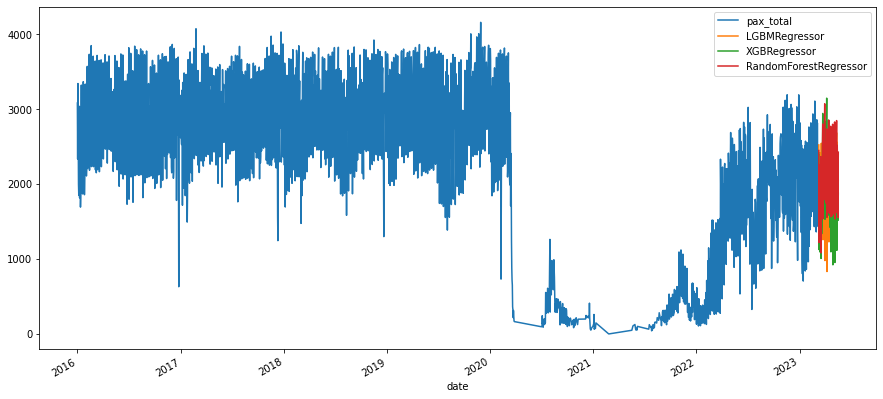

In [ ]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [ ]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [ ]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

In [ ]:
crossvalidation_df

,home_airport,date,cutoff,pax_total,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,LGW,2021-12-15,2021-12-14,229.0,348.645547,281.325165,267.72
1,LGW,2021-12-16,2021-12-14,429.0,593.762678,508.705139,428.76
2,LGW,2021-12-17,2021-12-14,676.0,670.195026,623.942871,445.82
3,LGW,2021-12-18,2021-12-14,286.0,409.170319,532.024414,339.56
4,LGW,2021-12-19,2021-12-14,676.0,803.159270,850.288818,678.39
...,...,...,...,...,...,...,...
445,LGW,2023-03-05,2022-12-09,2815.0,1865.829097,2310.340332,1553.94
446,LGW,2023-03-06,2022-12-09,1916.0,2222.291755,2665.737549,1668.80
447,LGW,2023-03-07,2022-12-09,1741.0,2131.488022,1903.722290,1928.02
448,LGW,2023-03-08,2022-12-09,1432.0,2069.155381,1967.471924,2089.95


In [ ]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.sqrt(mse(y, y_hat))

In [ ]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  1123.0405776208863
RandomForest RMSE using cross-validation:  1013.2061289311698
XGBoost RMSE using cross-validation:  1220.3735710301205
Ensemble RMSE using cross-validation:  1047.6225207933953


## Model avec Neural Forecast

In [ ]:
!pip install neuralforecast

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

In [ ]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

In [ ]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

,unique_id,ds,NBEATS,NHITS
0,LGW,2023-03-10,2265.771729,2221.245361
1,LGW,2023-03-11,1099.371582,1087.281616
2,LGW,2023-03-12,1955.275635,1997.968506
3,LGW,2023-03-13,1979.947266,2145.859619
4,LGW,2023-03-14,1705.986816,1522.316406
...,...,...,...,...
85,LGW,2023-06-03,1152.167725,1228.784668
86,LGW,2023-06-04,1912.655151,1931.157471
87,LGW,2023-06-05,2048.486328,2121.950928
88,LGW,2023-06-06,1654.967651,1506.189331


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

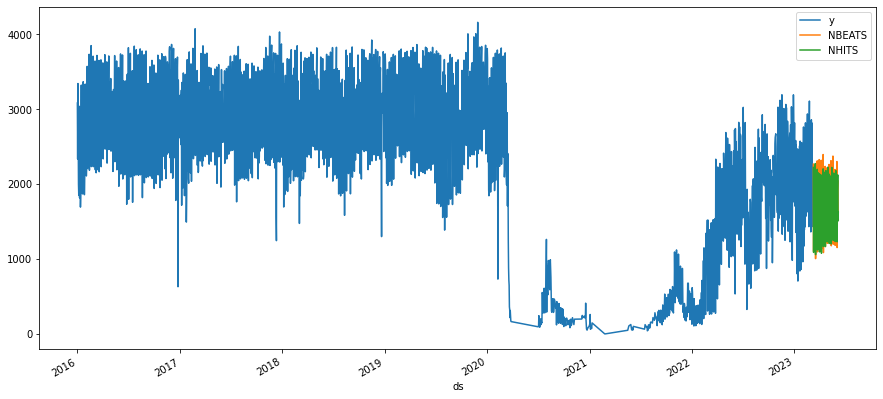

In [ ]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))